In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from datetime import datetime, timedelta

from population import Population

%matplotlib inline

In [2]:
population_file_name = 'data/population.json'
population = Population.from_json(population_file_name)

In [3]:
print len(population.people)

1000


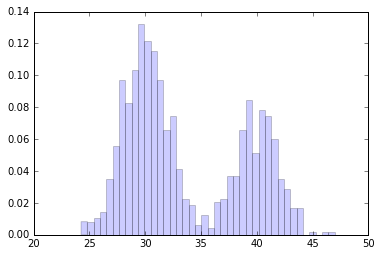

In [4]:
dt_fmt = '%Y%m%d'
now = datetime.strptime('20170718', dt_fmt)

ages = list()
for person in population.people.values():
    if person.dob is not None:
        age = now - datetime.strptime(person.dob, dt_fmt)
        if age.days/365.25 < 100:
            ages.append(age.days/365.25)

plt.hist(ages, bins=40, normed=True, alpha=0.2);

In [6]:
stats = dict([(person_id, {'group': 'control',
                           'viewed': 0,
                           'trx': 0,
                           'spend': 0.00}) for person_id in population.people])

transcript_file_name = 'data/transcript.json'
with open(transcript_file_name, 'r') as transcript_file:
    for line_number, line in enumerate(transcript_file):
        text = line.strip()
        if text != '':
            record = json.loads(text)
        
        if record['event'] == 'offer received':
            stats[record['person']]['group'] = 'target'
        
        if record['event'] == 'offer viewed':
            stats[record['person']]['viewed'] += 1
        
        if record['event'] == 'transaction':
            stats[record['person']]['trx'] += 1
            stats[record['person']]['spend'] += record['value']['amount']

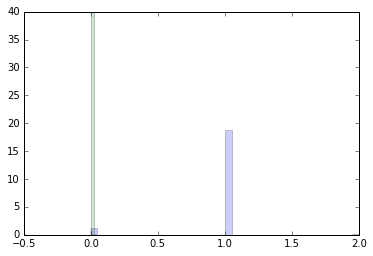

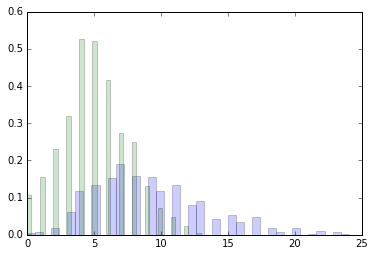

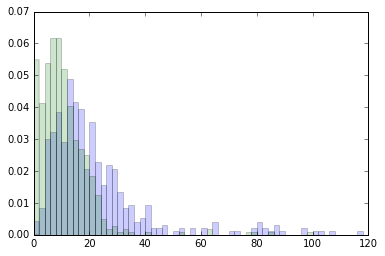

In [7]:
group_stats = {'target': {'viewed': list(), 'trx': list(), 'spend': list()},
               'control': {'viewed': list(), 'trx': list(), 'spend': list()}}

for val in stats.values():
    group = val['group']
    for field in ['viewed', 'trx', 'spend']:
        group_stats[group][field].append(val[field])

plt.hist(group_stats['target']['viewed'], bins=40, normed=True, alpha=0.2);
plt.hist(group_stats['control']['viewed'], bins=40, normed=True, alpha=0.2);
plt.show()

plt.hist(group_stats['target']['trx'], bins=40, normed=True, alpha=0.2);
plt.hist(group_stats['control']['trx'], bins=40, normed=True, alpha=0.2);
plt.show()

plt.hist(group_stats['target']['spend'], bins=range(0, 120, 2), normed=True, alpha=0.2);
plt.hist(group_stats['control']['spend'], bins=range(0, 120, 2), normed=True, alpha=0.2);
plt.show()